In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from pathlib import Path
from keras.preprocessing import image
from sklearn import svm

In [3]:
p = Path("Datasets/images/")
dirs = p.glob("*")

labels_dict = {'pikachu':0,'balbasaur':1,'charmander':2}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_name)
    label = str(folder_dir).split("/")[-1]
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        

/home/shubham/anaconda3/envs/my_env/lib/python3.7/site-packages/PIL/Image.py:965: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [8]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(304, 100, 100, 3) (304,)


In [9]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)

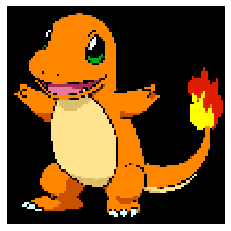

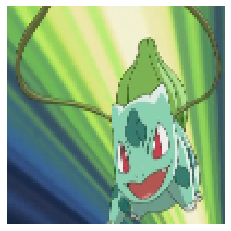

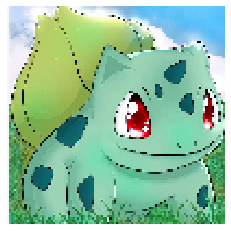

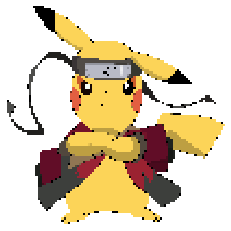

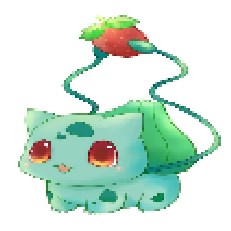

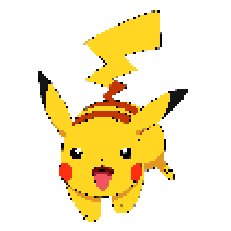

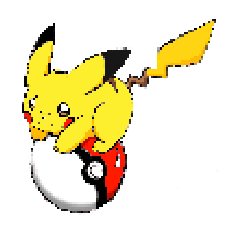

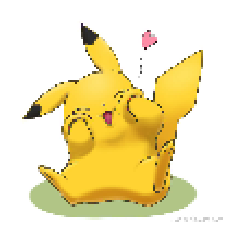

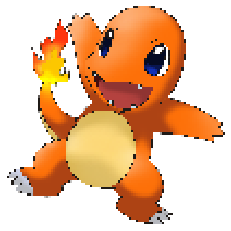

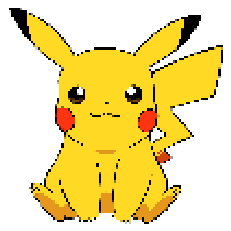

In [10]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

In [13]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(304, 30000)
(304,)


In [ ]:
CLASSES = len(np.unique(labels))
print(CLASSES)

In [11]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [12]:
svm_classifier.fit(image_data,labels)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
svm_classifier.score(image_data,labels)

In [6]:
svm_classifier.score(image_data[0],'pikachu')

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.